In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys,os,os.path
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import numpy as np
import pandas as pd

In [3]:
from invisible_cities.cities.components import track_blob_info_creator_extractor
from invisible_cities.io.hits_io        import load_hits
from invisible_cities.io.hits_io        import hits_from_df
from invisible_cities.core              import system_of_units as units
from invisible_cities.types.symbols     import HitEnergy
from invisible_cities.evm.event_model   import HitCollection
from invisible_cities.evm.event_model   import Cluster
from invisible_cities.evm.event_model   import Hit
from invisible_cities.types.ic_types    import xy
from invisible_cities.reco.paolina_functions import voxelize_hits
import invisible_cities.reco.paolina_functions as plf

from   matplotlib.animation import FuncAnimation
import matplotlib.pyplot    as     plt
import matplotlib.colors    as     colors
import matplotlib.cm        as     cm
from matplotlib.colors import Normalize

In [25]:
def plot_voxels(df, base_vsize = 12):

    xs = df.X
    ys = df.Y
    zs = df.Z
    es = df.E

    the_hits = []
    for x, y, z, e in zip(xs, ys, zs, es):
        if np.isnan(e): continue
        h = Hit(0, Cluster(0, xy(x,y), xy(0,0), 0), z, e*1000, xy(0,0))
        the_hits.append(h)
    
    voxels = voxelize_hits(the_hits,
                           np.array([base_vsize, base_vsize, base_vsize]), False)
    
    vsizex = voxels[0].size[0]
    vsizey = voxels[0].size[1]
    vsizez = voxels[0].size[2]

    min_corner_x = min(v.X for v in voxels) - vsizex/2.
    min_corner_y = min(v.Y for v in voxels) - vsizey/2.
    min_corner_z = min(v.Z for v in voxels) - vsizez/2.

    
    x = [np.round(v.X/vsizex) for v in voxels]
    y = [np.round(v.Y/vsizey) for v in voxels]
    z = [np.round(v.Z/vsizez) for v in voxels]
    e = [v.E for v in voxels]

    x_min = int(min(x))
    y_min = int(min(y))
    z_min = int(min(z))

    x_max = int(max(x))
    y_max = int(max(y))
    z_max = int(max(z))

    VOXELS = np.zeros((x_max-x_min+1, y_max-y_min+1, z_max-z_min+1))
    #print(VOXELS.shape)

    # sort through the event set the "turn on" the hit voxels
    cmap = cm.viridis
    norm = Normalize(vmin=0, vmax=max(e))

    colors = np.empty(VOXELS.shape, dtype=object)
    for q in range(0,len(z)):
        VOXELS[int(x[q])-x_min][int(y[q])-y_min][int(z[q])-z_min] = 1
        colors[int(x[q])-x_min][int(y[q])-y_min][int(z[q])-z_min] = cmap(norm(e[q]))

    # and plot everything
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    #a,b,c is spacing in mm needs an extra dim
    a,b,c = np.indices((x_max-x_min+2, y_max-y_min+2, z_max-z_min+2))
    a = a*vsizex + min_corner_x
    b = b*vsizey + min_corner_y
    c = c*vsizez + min_corner_z

    # a, b, c are the corners of the voxels
    ax.voxels(a,b,c, VOXELS, facecolors=colors , edgecolor='k',alpha=0.8)

    ax.set_xlabel('x (mm)')#,fontsize=16)
    ax.set_ylabel('y (mm)')#,fontsize=16)
    ax.set_zlabel('z (mm)')#,fontsize=16)


    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm)
    cb.set_label('Energy (keV)')

    fig.suptitle('voxelised_plot_two_tracks')

    #ax.view_init(-160, 90)

    plt.show(fig)

In [26]:
# create hit collection (look at how the tests do it, there are probably fixtures)
#ICTDIR = '/home/e78368jw/Documents/NEXT_CODE/IC/invisible_cities/'
#ICDATADIR = os.path.join(ICTDIR, "database/test_data/")
#hits_file_name = os.path.join(ICDATADIR, "Kr_hits_for_psf_0.h5")
#hits_file_name = '/home/e78368jw/Downloads/sophronia_1_208Tl.h5'
#hits = load_hits(hits_file_name)

In [27]:
tr_1 = []
for i in range(0, 5):
    z_1 = np.random.uniform(low = 1 * units.mm, high = 20 * units.mm)
    z_2 = np.random.uniform(low = 1 * units.mm, high = 20 * units.mm)
    tr_1.append([0, 1, (9 * i + 1) * units.mm, 0 * units.mm, z_1, 1, 10, 10])
    tr_1.append([0, 1, (9 * i + 1) * units.mm + 1, 30 * units.mm, z_2, 1, 10, 10])

data = pd.DataFrame(tr_1, columns = ['event', 'npeak', 'X', 'Y', 'Z', 'Q', 'E', 'Ep'])

display(data)

,event,npeak,X,Y,Z,Q,E,Ep
0,0,1,1.0,0.0,16.180052,1,10,10
1,0,1,2.0,30.0,5.273211,1,10,10
2,0,1,10.0,0.0,18.761567,1,10,10
3,0,1,11.0,30.0,11.019899,1,10,10
4,0,1,19.0,0.0,10.091067,1,10,10
5,0,1,20.0,30.0,10.767872,1,10,10
6,0,1,28.0,0.0,16.137978,1,10,10
7,0,1,29.0,30.0,8.528375,1,10,10
8,0,1,37.0,0.0,12.910490,1,10,10
9,0,1,38.0,30.0,6.397701,1,10,10


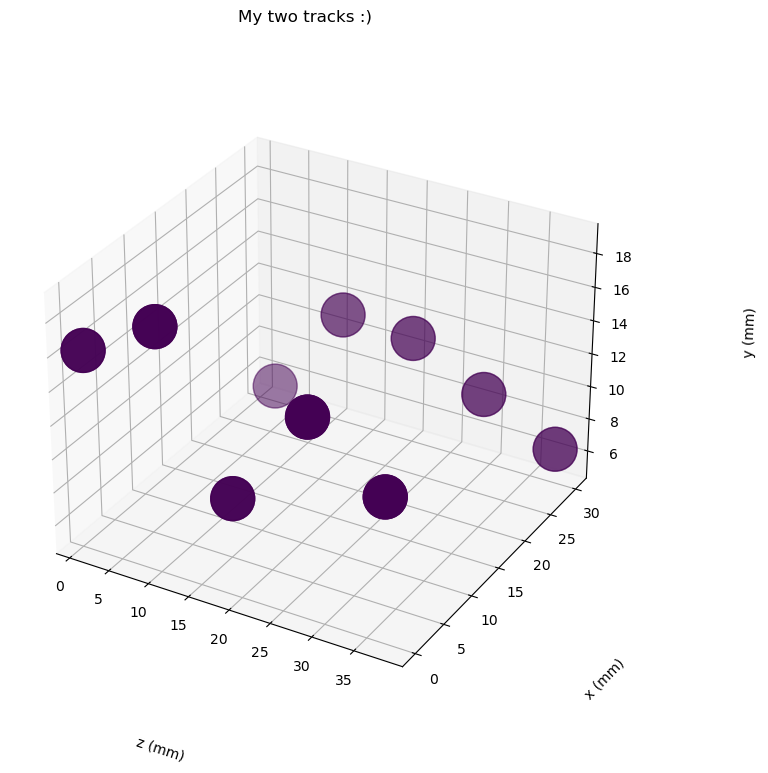

In [28]:
plt.ion()
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')
for Y, df in data.groupby(['Y']):
    ax.scatter(data.X, data.Y, data.Z, c=data.E, s=1000, label = f'{Y}')
ax.set_xlabel("z (mm)", labelpad=50)
ax.set_ylabel("x (mm)", labelpad=50)
ax.set_zlabel("y (mm)", labelpad=50)
plt.suptitle("My two tracks :)")

plt.show()

/tmp/ipykernel_76177/96440492.py:53: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


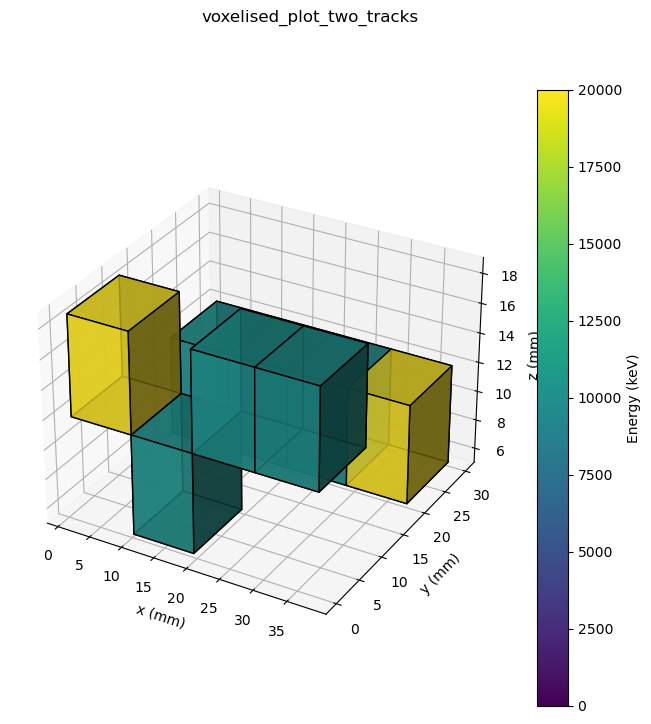

In [29]:
plot_voxels(data)

In [30]:
topological_creator = track_blob_info_creator_extractor((12 * units.mm, 12 * units.mm, 12 * units.mm),
                                                        False,
                                                        10 * units.keV,
                                                        3,
                                                        27 * units.mm,
                                                        1000000
                                                        )

In [31]:
hits_lol = hits_from_df(data)

df, track_hitc, out_of_map = topological_creator(hits_lol[0])

df
hit_energies
10
True
New shortest distance: 20.000000000003997
min_track_sep: 20.000000000003997
track_hitc


In [ ]:
pd.options.display.max_columns = None
display(df)
display(track_hitc)
display(out_of_map)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,r_min,x_max,y_max,z_max,r_max,x_ave,y_ave,z_ave,r_ave,extreme1_x,extreme1_y,extreme1_z,extreme2_x,extreme2_y,extreme2_z,blob1_x,blob1_y,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,min_track_sep
0,0,0,50.0,32.145103,4,5,2,1.0,0.0,10.091067,1.000000,37.0,0.0,18.761567,37.000000,19.0,0.0,14.816231,19.000000,5.625,5.0,15.389478,33.375,5.0,15.389478,5.5,0.0,17.470809,37.0,0.0,12.910490,40.0,30.0,20.0,9.25,10.0,6.744178,20.0
1,0,1,50.0,27.750000,4,5,2,2.0,30.0,5.273211,30.066593,38.0,30.0,11.019899,48.414874,20.0,30.0,8.397411,37.643072,5.625,25.0,8.645300,33.375,25.0,8.645300,33.5,30.0,7.463038,2.0,30.0,5.273211,40.0,30.0,20.0,9.25,10.0,6.744178,20.0


HitCollectionHit list:<Hit : npeak = 1.0 z = 16.18005169814926 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=1.0, y=0.0) 3dHit = Hit(1.0, 0.0, 16.18005169814926, E=10.0)  > ><Hit : npeak = 1.0 z = 18.761566869317793 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=10.0, y=0.0) 3dHit = Hit(10.0, 0.0, 18.761566869317793, E=10.0)  > ><Hit : npeak = 1.0 z = 10.091067361774817 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=19.0, y=0.0) 3dHit = Hit(19.0, 0.0, 10.091067361774817, E=10.0)  > ><Hit : npeak = 1.0 z = 16.13797816243828 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=28.0, y=0.0) 3dHit = Hit(28.0, 0.0, 16.13797816243828, E=10.0)  > ><Hit : npeak = 1.0 z = 12.910490411390189 XYpeak = -1000, -1

False

### distance between the two tracks

testing

In [12]:
# collect the voxels
def voxelise(df, base_vsize = 12):
    xs = df.X
    ys = df.Y
    zs = df.Z
    es = df.E

    the_hits = []
    for x, y, z, e in zip(xs, ys, zs, es):
        if np.isnan(e): continue
        h = Hit(0, Cluster(0, xy(x,y), xy(0,0), 0), z, e*1000, xy(0,0))
        the_hits.append(h)

    voxels = voxelize_hits(the_hits,
                            np.array([base_vsize, base_vsize, base_vsize]), False)

    return voxels

In [13]:
voxels = voxelise(data)
print(voxels)

[Voxel(5.624999999997749, 4.999999999997999, 6.1852904503256845, E=10000.0), Voxel(5.624999999997749, 4.999999999997999, 14.331990052212177, E=10000.0), Voxel(5.624999999997749, 25.000000000001997, 14.331990052212177, E=10000.0), Voxel(14.87499999999925, 4.999999999997999, 14.331990052212177, E=10000.0), Voxel(14.87499999999925, 25.000000000001997, 6.1852904503256845, E=10000.0), Voxel(24.12500000000075, 4.999999999997999, 14.331990052212177, E=10000.0), Voxel(24.12500000000075, 25.000000000001997, 6.1852904503256845, E=10000.0), Voxel(33.375000000002245, 4.999999999997999, 14.331990052212177, E=10000.0), Voxel(33.375000000002245, 25.000000000001997, 6.1852904503256845, E=20000.0)]


In [14]:
# tracks from voxels
mod_voxels, dropped_voxels = plf.drop_end_point_voxels(voxels, 10 * units.keV, 3)
tracks = plf.make_track_graphs(mod_voxels)

display(tracks)

(<networkx.classes.graph.Graph at 0x7b6405bc7610>,
 <networkx.classes.graph.Graph at 0x7b6405bc7760>)

In [19]:
import networkx as nx

print(tracks[0])
print(tracks[0].nodes())
print(type(tracks[0].nodes()))

# lets test minimum distance between these two here
#x = min(dist(v1, v2) for i, v1 in enumerate(tracks[0].nodes()) for v2 in tracks[1].nodes()[i:])

Graph with 5 nodes and 5 edges
[Voxel(5.624999999997749, 4.999999999997999, 6.1852904503256845, E=10000.0), Voxel(5.624999999997749, 4.999999999997999, 14.331990052212177, E=10000.0), Voxel(14.87499999999925, 4.999999999997999, 14.331990052212177, E=10000.0), Voxel(24.12500000000075, 4.999999999997999, 14.331990052212177, E=10000.0), Voxel(33.375000000002245, 4.999999999997999, 14.331990052212177, E=10000.0)]
<class 'networkx.classes.reportviews.NodeView'>


AttributeError: 'NodeView' object has no attribute 'voxelpos'

In [24]:
track_pos = {}
for c, t in enumerate(tracks, 0):
    vox_pos_list = []
    for node in t.nodes():
        vox_pos_list.append(node.voxelpos)
    # create track dictionary related to the enumeration containing the positions
    track_pos[c] = np.array(vox_pos_list)

track_pos

{0: array([[ 5.625     ,  5.        ,  6.18529045],
        [ 5.625     ,  5.        , 14.33199005],
        [14.875     ,  5.        , 14.33199005],
        [24.125     ,  5.        , 14.33199005],
        [33.375     ,  5.        , 14.33199005]]),
 1: array([[33.375     , 25.        ,  6.18529045],
        [ 5.625     , 25.        , 14.33199005],
        [24.125     , 25.        ,  6.18529045],
        [14.875     , 25.        ,  6.18529045]])}

In [33]:
print(track_pos[0])
print("=====================================")
print(track_pos[1])
print("=====================================")
print(track_pos[0][:, np.newaxis])
print("=====================================")
print(track_pos[0][:, np.newaxis] - track_pos[1])

[[ 5.625       5.          6.18529045]
 [ 5.625       5.         14.33199005]
 [14.875       5.         14.33199005]
 [24.125       5.         14.33199005]
 [33.375       5.         14.33199005]]
[[33.375      25.          6.18529045]
 [ 5.625      25.         14.33199005]
 [24.125      25.          6.18529045]
 [14.875      25.          6.18529045]]
[[[ 5.625       5.          6.18529045]]

 [[ 5.625       5.         14.33199005]]

 [[14.875       5.         14.33199005]]

 [[24.125       5.         14.33199005]]

 [[33.375       5.         14.33199005]]]
[[[-27.75      -20.          0.       ]
  [  0.        -20.         -8.1466996]
  [-18.5       -20.          0.       ]
  [ -9.25      -20.          0.       ]]

 [[-27.75      -20.          8.1466996]
  [  0.        -20.          0.       ]
  [-18.5       -20.          8.1466996]
  [ -9.25      -20.          8.1466996]]

 [[-18.5       -20.          8.1466996]
  [  9.25      -20.          0.       ]
  [ -9.25      -20.          8.14

In [36]:
# nearest distance between the two track positions
pairwise_distances = np.linalg.norm(track_pos[0][:, np.newaxis] - track_pos[1], axis = 2)

print(pairwise_distances)
print(np.min(pairwise_distances))

[[34.20617634 21.59557164 27.24426545 22.03548275]
 [35.16292386 20.         28.43622187 23.49321635]
 [28.43622187 22.03548275 23.49321635 21.59557164]
 [23.49321635 27.24426545 21.59557164 23.49321635]
 [21.59557164 34.20617634 23.49321635 28.43622187]]
20.000000000003997


In [39]:
from itertools import combinations
# so to formalise neatly:

# collect voxel positions
voxel_pos = []
for c, t in enumerate(tracks, 0):
    vox_pos_list = []
    for node in t.nodes():
        vox_pos_list.append(node.voxelpos)
    # create track dictionary related to the enumeration containing the positions
    voxel_pos.append(np.array(vox_pos_list))

# Function to calculate pairwise distances
def pairwise(xyz1, xyz2):
    # subtracts the two arrays from one another, with a new axis for xyz1
    # then applies the linalg across the 2nd axis (within each xyz component wrt
    # every other xyz component
    return np.linalg.norm(xyz1[:, np.newaxis] - xyz2, axis=2)

# go through all combinations of the different tracks wrt one another using combinations
# this could take a long time for many tracks! Be careful!
shortest_distance = None
for (i, xyz1), (j, xyz2) in combinations(enumerate(voxel_pos), 2):
    distances = pairwise(xyz1, xyz2)
    # calculate shortest distance
    local_short_distance = np.min(distances)
    if shortest_distance == None:
        print(f"New shortest distance: {local_short_distance}")
        shortest_distance = local_short_distance
    else:
        if local_short_distance < shortest_distance:
            print(f"New shortest distance: {local_short_distance}")
            shortest_distance = local_short_distance


New shortest distance: 20.000000000003997


### Ran it over a single file, lets load it in and look

In [8]:
path = '/home/e78368jw/Downloads/test_data/proximity/isaura_1_208Tl.h5'
data = pd.read_hdf(path, 'Tracking/Tracks')

In [9]:
display(data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,min_track_sep
0,0,0,0.430137,42.219578,36,4200,3,351.875,-207.425,773.807738,...,392.553402,-193.996445,778.724004,0.325842,0.274363,0.170068,8.909091,8.938776,8.985429,177.589534
1,0,1,0.100154,15.492306,7,718,3,253.875,-46.425,857.615981,...,265.362191,-36.377118,868.992086,0.100154,0.100154,0.100154,8.909091,8.938776,8.985429,177.589534
2,0,2,0.019781,15.492306,2,71,3,214.875,205.575,795.273675,...,218.590523,211.170733,797.181647,0.019781,0.019781,0.019781,8.909091,8.938776,8.985429,177.589534
3,2,0,2.199912,499.762729,351,21994,2,125.875,-95.425,505.002684,...,291.968568,179.039013,529.855947,0.400130,0.067598,0.000000,8.681818,9.000000,8.834166,112.996027
4,2,1,0.153573,21.186776,6,847,2,111.875,-121.425,401.142328,...,133.016578,-115.886194,406.039125,0.153573,0.153573,0.153573,8.681818,9.000000,8.834166,112.996027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,646,1,0.185982,20.843466,9,1055,3,206.875,167.575,595.195716,...,227.378097,176.879945,602.468363,0.185982,0.185982,0.185982,8.642857,8.400000,8.611381,27.241548
635,646,2,0.029640,8.400000,2,139,3,319.875,153.575,565.490166,...,322.337162,162.249784,566.635683,0.029640,0.029640,0.029640,8.642857,8.400000,8.611381,27.241548
636,648,0,0.480633,33.379377,19,1617,3,110.875,-229.425,34.134343,...,135.346019,-224.123951,50.135720,0.451764,0.450675,0.421806,9.000000,8.666667,8.967392,52.338827
637,648,1,0.124540,24.046043,9,771,3,59.875,-72.425,665.535675,...,69.636085,-68.139340,671.791432,0.124540,0.124540,0.124540,9.000000,8.666667,8.967392,52.338827


In [ ]:
# extract relevant data
track_sep = data.min_track_sep
print(len(track_sep))
# remove the single tracks
track_sep = track_sep[track_sep < 99999]
print(type(track_sep))
print(len(track_sep))


639
<class 'pandas.core.series.Series'>
505


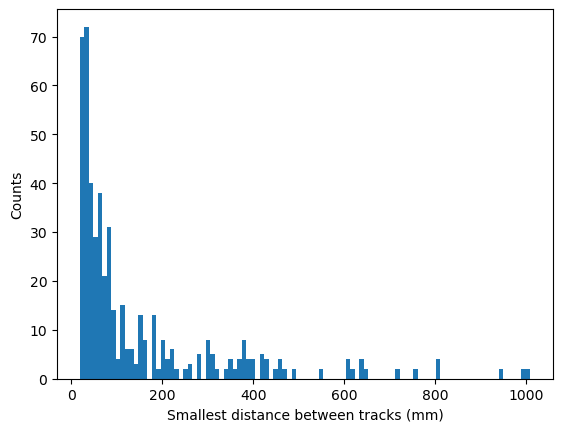

In [23]:
plt.hist(track_sep, bins = 100)
plt.xlabel("Smallest distance between tracks (mm)")
plt.ylabel("Counts")
plt.show()

Text(0.5, 0, 'Track lengths (mm)')

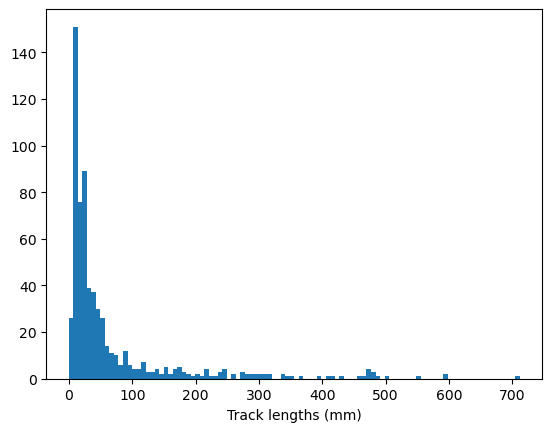

In [25]:
plt.hist(data.length, bins = 100)
plt.xlabel("Track lengths (mm)")

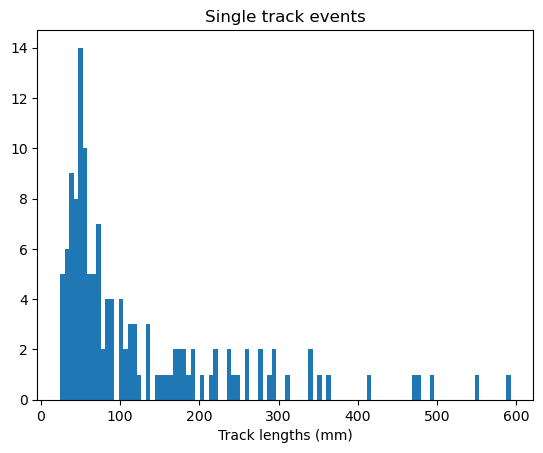

In [27]:
# lets look at single track lengths
plt.hist(data[data.numb_of_tracks == 1].length, bins = 100)
plt.xlabel("Track lengths (mm)")
plt.title("Single track events")
plt.show()